<a href="https://colab.research.google.com/github/nickname8888/Quaternions-LPI/blob/main/eng_gan_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !unzip '/content/drive/MyDrive/datasets/EnglishFnt.zip' -d '/content/drive/MyDrive/datasets/English5/'

In [ ]:
# !unzip '/content/drive/MyDrive/datasets/Fnt58.zip' -d '/content/drive/MyDrive/datasets/English/Fnt'

In [ ]:
# import pathlib
# data_dir = pathlib.Path('/content/drive/MyDrive/datasets/Fnt-parts/')
# image_count = len(list(data_dir.glob('*/*.png')))
# print(image_count)
# import os
# content = os.listdir('/content/drive/MyDrive/datasets/English/Fnt/Sample061')
# len(content)

In [ ]:
#first making a discriminator

In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
batch_size = 16
img_size = 32

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/datasets/Fnt-parts/',
    batch_size = batch_size, image_size = (img_size, img_size),
    seed=115, validation_split=0.2, subset='training',
    color_mode='grayscale'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/datasets/Fnt-parts/',
    batch_size = batch_size, image_size = (img_size, img_size),
    seed=115, validation_split=0.2, subset='validation',
    color_mode='grayscale'
)

Found 5080 files belonging to 5 classes.
Using 4064 files for training.
Found 5080 files belonging to 5 classes.
Using 1016 files for validation.


In [ ]:
#normalizing dataset
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda xx, yy: (normalization_layer(xx), yy))
val_ds = val_ds.map(lambda xx, yy: (normalization_layer(xx), yy))

In [ ]:
# basic_discriminator_model = tf.keras.models.Sequential()
# basic_discriminator_model.add(layers.Conv2D(32, 5, 1, activation='relu', input_shape=(img_size, img_size, 3)))
# basic_discriminator_model.add(layers.Conv2D(64, 3, 2, activation='relu'))
# basic_discriminator_model.add(layers.Dropout(0.2))
# basic_discriminator_model.add(layers.Conv2D(64, 3, 2, activation='relu'))
# basic_discriminator_model.add(layers.Dropout(0.2))
# basic_discriminator_model.add(layers.Conv2D(128, 3, 2, activation='relu'))
# basic_discriminator_model.add(layers.Dropout(0.3))
# basic_discriminator_model.add(layers.Conv2D(128, 3, 2, activation='relu'))
# basic_discriminator_model.add(layers.Dropout(0.3))
# basic_discriminator_model.add(layers.Flatten())
# # basic_discriminator_model.add(layers.Dense(256, activation='relu'))
# # basic_discriminator_model.add(layers.Dropout(0.3))
# basic_discriminator_model.add(layers.Dense(128, activation='relu'))
# basic_discriminator_model.add(layers.Dropout(0.3))
# basic_discriminator_model.add(layers.Dense(62))


def ff():
  model = tf.keras.models.Sequential()
  model.add(layers.Conv2D(32, 5, 1, activation='relu', input_shape=(img_size, img_size, 1)))
  model.add(layers.Conv2D(64, 3, 2, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(64, 3, 2, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(64, 3, 2, activation='relu'))
  model.add(layers.Dropout(0.3))
  model.add(layers.Conv2D(128, 3, 2, activation='relu'))
  model.add(layers.Dropout(0.3))
  model.add(layers.Flatten())
  # model.add(layers.Dense(256, activation='relu'))
  # model.add(layers.Dropout(0.3))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(1))
  model.summary()
  return model

basic_discriminator_model = ff()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (None, 124, 124, 32)      832       
                                                                 
 conv2d_59 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 dropout_54 (Dropout)        (None, 61, 61, 64)        0         
                                                                 
 conv2d_60 (Conv2D)          (None, 30, 30, 64)        36928     
                                                                 
 dropout_55 (Dropout)        (None, 30, 30, 64)        0         
                                                                 
 conv2d_61 (Conv2D)          (None, 14, 14, 64)        36928     
                                                                 
 dropout_56 (Dropout)        (None, 14, 14, 64)      

In [ ]:
basic_discriminator_model.compile('adam', tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = basic_discriminator_model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
127/127 [==============================] - 11s 75ms/step - loss: nan - accuracy: 0.2010 - val_loss: nan - val_accuracy: 0.1959
Epoch 2/10
127/127 [==============================] - 10s 73ms/step - loss: nan - accuracy: 0.2010 - val_loss: nan - val_accuracy: 0.1959
Epoch 3/10
127/127 [==============================] - 10s 73ms/step - loss: nan - accuracy: 0.2010 - val_loss: nan - val_accuracy: 0.1959
Epoch 4/10
127/127 [==============================] - 10s 72ms/step - loss: nan - accuracy: 0.2010 - val_loss: nan - val_accuracy: 0.1959
Epoch 5/10
127/127 [==============================] - 10s 72ms/step - loss: nan - accuracy: 0.2010 - val_loss: nan - val_accuracy: 0.1959
Epoch 6/10
127/127 [==============================] - 9s 72ms/step - loss: nan - accuracy: 0.2010 - val_loss: nan - val_accuracy: 0.1959
Epoch 7/10
127/127 [==============================] - 10s 73ms/step - loss: nan - accuracy: 0.2010 - val_loss: nan - val_accuracy: 0.1959
Epoch 8/10
127/127 [===============

In [ ]:
#now starting work on gan

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/datasets/Fnt-parts/',
    batch_size = batch_size, image_size = (img_size, img_size),
    label_mode=None,
    color_mode='grayscale'
    # seed=111, validation_split=0.2, subset='training'
)
train_dataset = train_dataset.map(lambda x: x / 255.0)

Found 5080 files belonging to 1 classes.


In [ ]:
# for a, b in train_dataset:
#   print(a)
#   print(b)
#   break
len(train_dataset)

127

In [ ]:
dataset_new = train_dataset.take(500)

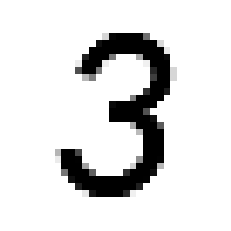

In [ ]:
for x in train_dataset:
    plt.axis("off")
    plt.imshow((x.numpy() * 255).astype("int32")[3].reshape(32, 32), interpolation='nearest', cmap='gray')
    break

In [ ]:
import os
os.chdir('/content/drive/MyDrive/datasets/models/eng-gan-4')

In [ ]:
def create_discriminator():
  model = tf.keras.models.Sequential()
  model.add(layers.Conv2D(32, 5, 1, activation='relu', input_shape=(img_size, img_size, 1)))
  model.add(layers.Conv2D(64, 3, 1, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.MaxPool2D())
  model.add(layers.Conv2D(96, 3, 1, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.MaxPool2D())
  # model.add(layers.Conv2D(64, 3, 1, activation='relu'))
  # model.add(layers.Dropout(0.3))
  # model.add(layers.MaxPool2D())
  model.add(layers.Conv2D(128, 3, 1, activation='relu'))
  model.add(layers.Dropout(0.3))
  # model.add(layers.MaxPool2D())
  model.add(layers.Flatten())
  # model.add(layers.Dense(256, activation='relu'))
  # model.add(layers.Dropout(0.3))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(1))
  
  return model

In [ ]:
d = create_discriminator()
d.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 96)        55392     
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 96)        0         
                                                        

In [ ]:
def create_generator():
    model = tf.keras.Sequential()
    
    # creating Dense layer with units 7*7*256(batch_size) and input_shape of (100,)
    model.add(layers.Dense(8*8, use_bias=False, input_shape=(100,)))
    # model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # model.add(layers.Dense(7*7*4, use_bias=False, input_shape=(100,)))
    # model.add(layers.BatchNormalization())
    # model.add(layers.LeakyReLU())

    model.add(layers.Reshape((8, 8, 1)))

    model.add(layers.Conv2DTranspose(32, 3, strides=(1, 1), padding='same', use_bias=False))
    # model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, 3, 2, padding='same', use_bias=False))
    # model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(128, 3, 2, padding='same', use_bias=False))
    # model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # model.add(layers.Conv2DTranspose(128, 3, 2, padding='same', use_bias=False))
    # model.add(layers.BatchNormalization())
    # model.add(layers.LeakyReLU())

    # model.add(layers.Conv2DTranspose(128, 3, 2, padding='same', use_bias=False))
    # # model.add(layers.BatchNormalization())
    # model.add(layers.LeakyReLU())

    # model.add(layers.Conv2DTranspose(256, 3, 2, padding='same', use_bias=False))
    # # model.add(layers.BatchNormalization())
    # model.add(layers.LeakyReLU())

    model.add(layers.Conv2D(1, (5, 5), 1, padding='same', use_bias=False, activation='tanh'))

    return model

In [ ]:
g = create_generator()
g.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                6400      
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 64)                0         
                                                                 
 reshape_2 (Reshape)         (None, 8, 8, 1)           0         
                                                                 
 conv2d_transpose_7 (Conv2DT  (None, 8, 8, 32)         288       
 ranspose)                                                       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 8, 8, 32)          0         
                                                                 
 conv2d_transpose_8 (Conv2DT  (None, 16, 16, 64)       18432     
 ranspose)                                            

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def d_loss(real_output, fake_output):
  real_loss = cross_entropy(tf.ones_like(real_output), real_output)
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
  return real_loss + fake_loss

def g_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
noise_dim = 100
num_of_generated_samples = 16
seed = tf.random.normal([num_of_generated_samples, noise_dim])

In [ ]:
generator = create_generator()
discriminator = create_discriminator()

In [ ]:
# discriminator = create_discriminator()

In [ ]:
# generator = tf.keras.models.load_model("/content/drive/MyDrive/datasets/models/eng-gan-2-g.h5")
# discriminator = tf.keras.models.load_model("/content/drive/MyDrive/datasets/models/eng-gan-2-d.h5")

In [ ]:
@tf.function
def train_step(images):
  global generator, discriminator
  noise = tf.random.normal([num_of_generated_samples, noise_dim])

  with tf.GradientTape() as gtape, tf.GradientTape() as dtape:
    generated_images = generator(noise, training=True)
    real_output = discriminator(images, training=True)
    fake_output = discriminator(generated_images, training=True)
    gloss = g_loss(fake_output)
    dloss = d_loss(real_output, fake_output)
  generator_gradient = gtape.gradient(gloss, generator.trainable_variables)
  discriminator_gradient = dtape.gradient(dloss, discriminator.trainable_variables)
  generator_optimizer.apply_gradients(zip(generator_gradient, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradient, discriminator.trainable_variables))

In [ ]:
from tqdm import tqdm

def train_gan(dataset, epochs):
  for epoch in range(epochs):
    for image_batch in tqdm(dataset):
      train_step(image_batch)
    
    noise = tf.random.normal([64, noise_dim])
    generated_images = generator.predict(noise)
    dim=(8,8)
    figsize=(10,10)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
      plt.subplot(dim[0], dim[1], i+1)
      plt.imshow(generated_images[i].reshape(32, 32), interpolation='nearest', cmap='gray')
      plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image '+ str(epoch+50) + '.png')

100%|██████████| 318/318 [00:09<00:00, 34.39it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
100%|██████████| 318/318 [00:09<00:00, 34.26it/s]


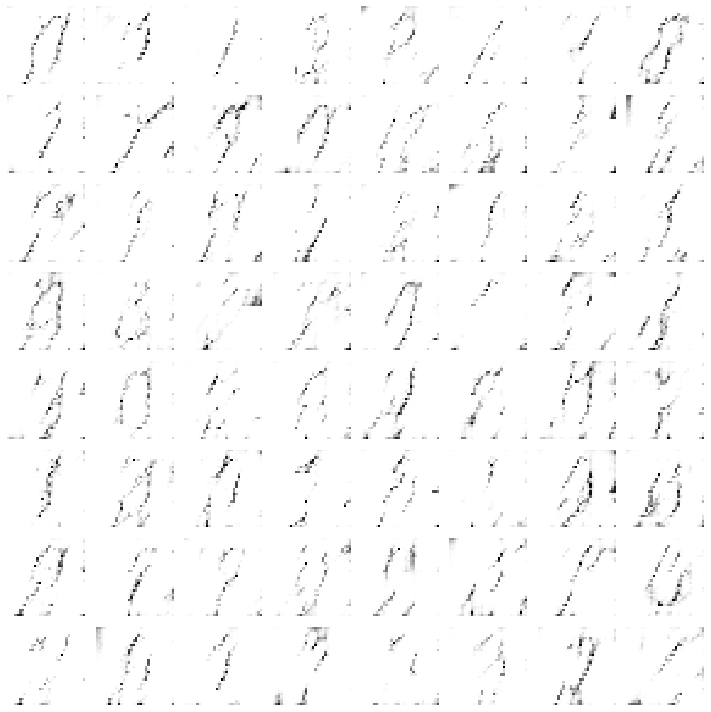

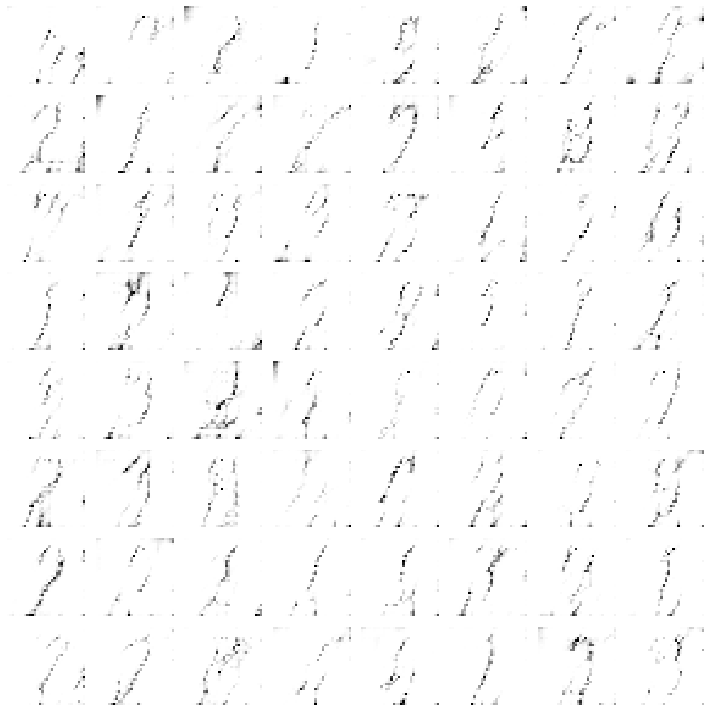

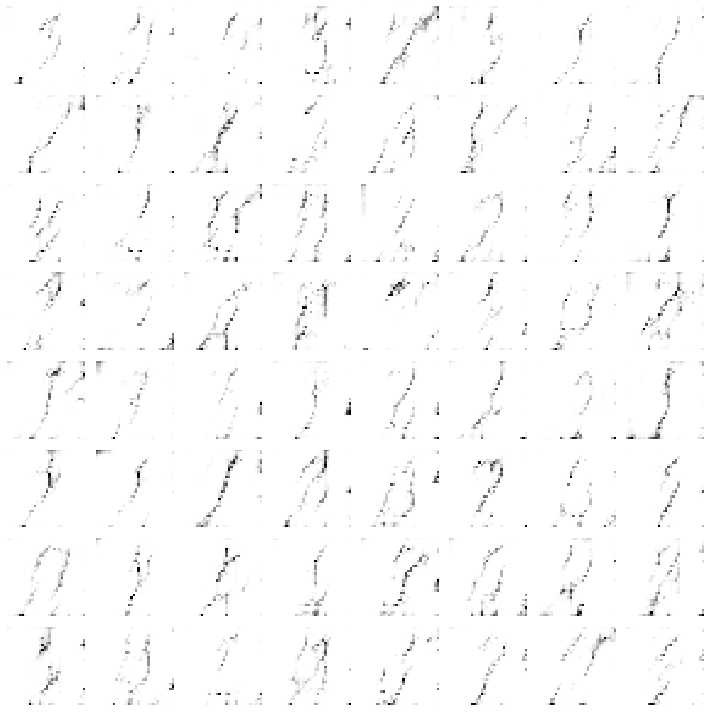

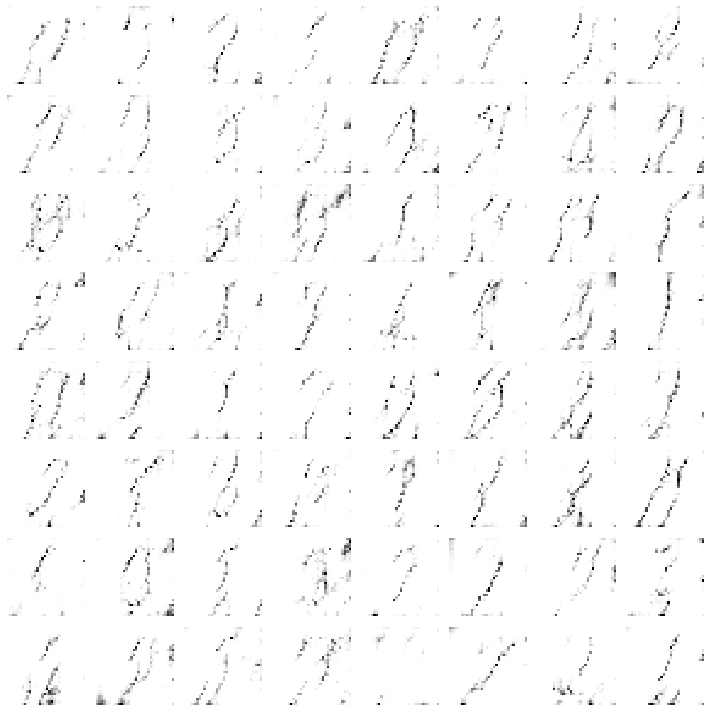

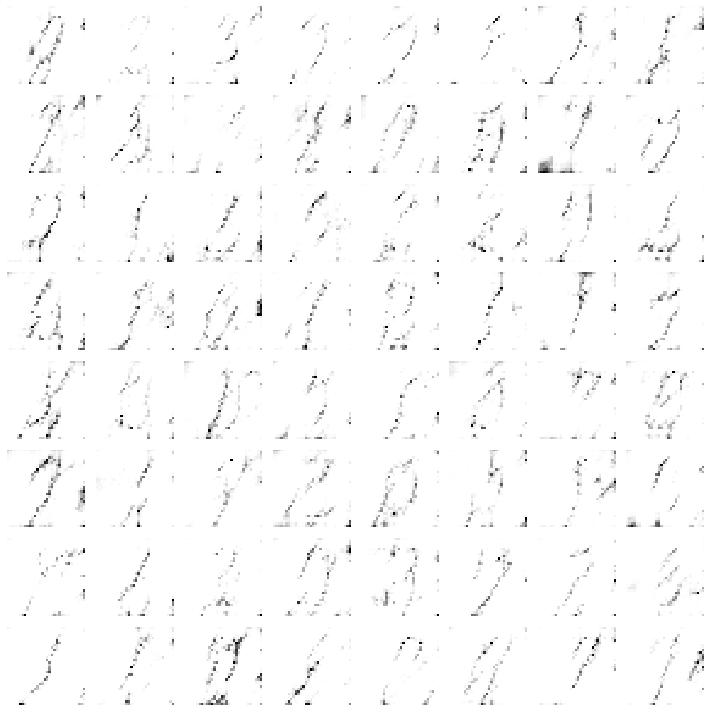

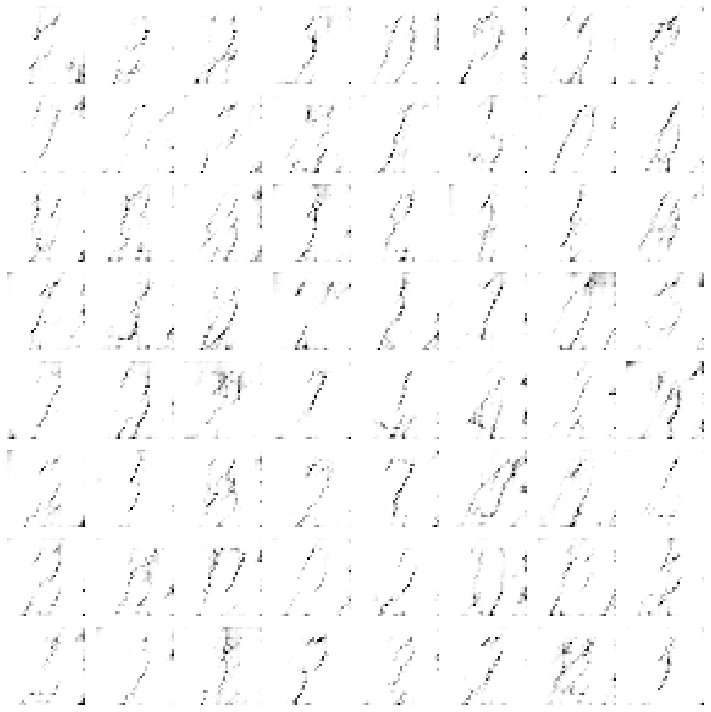

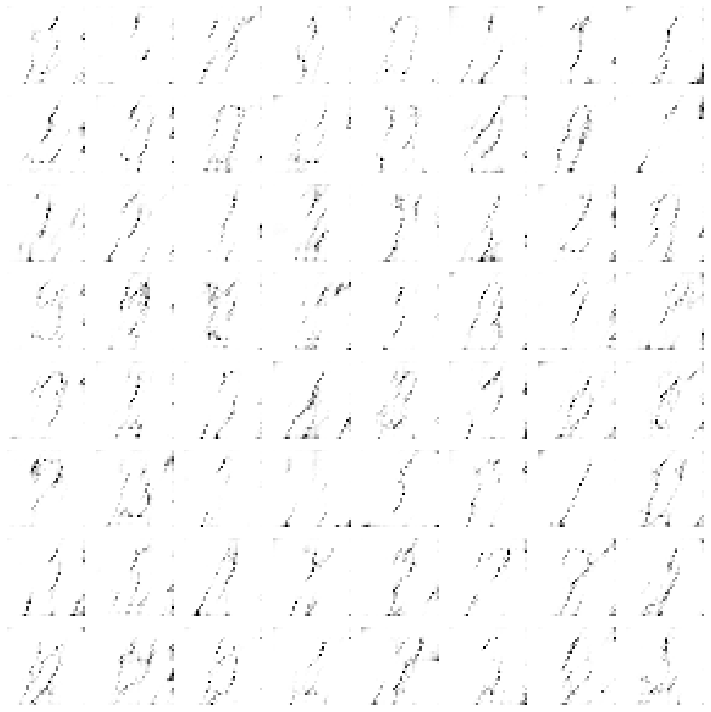

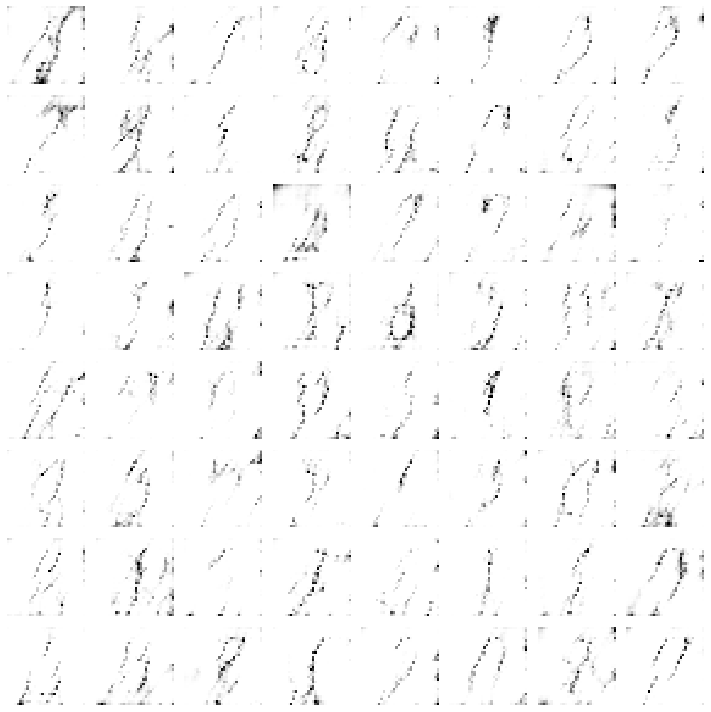

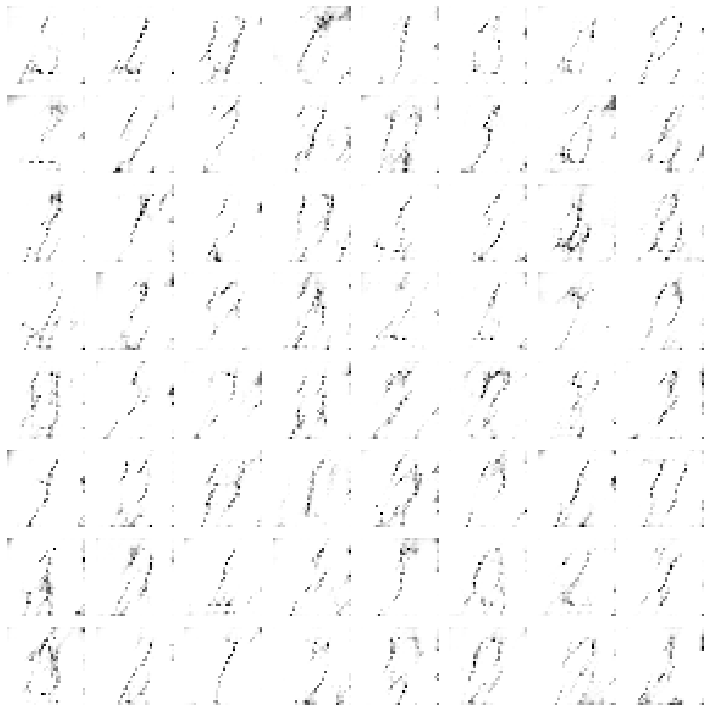

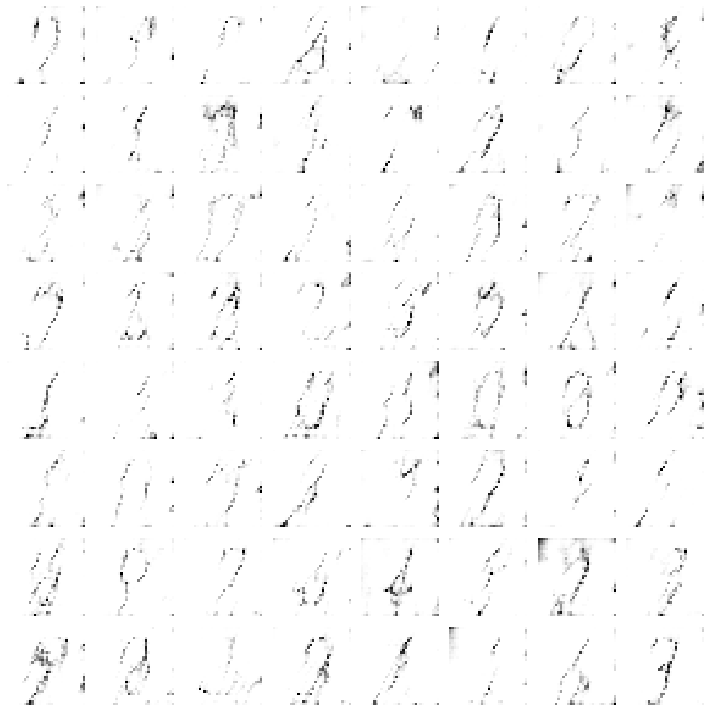

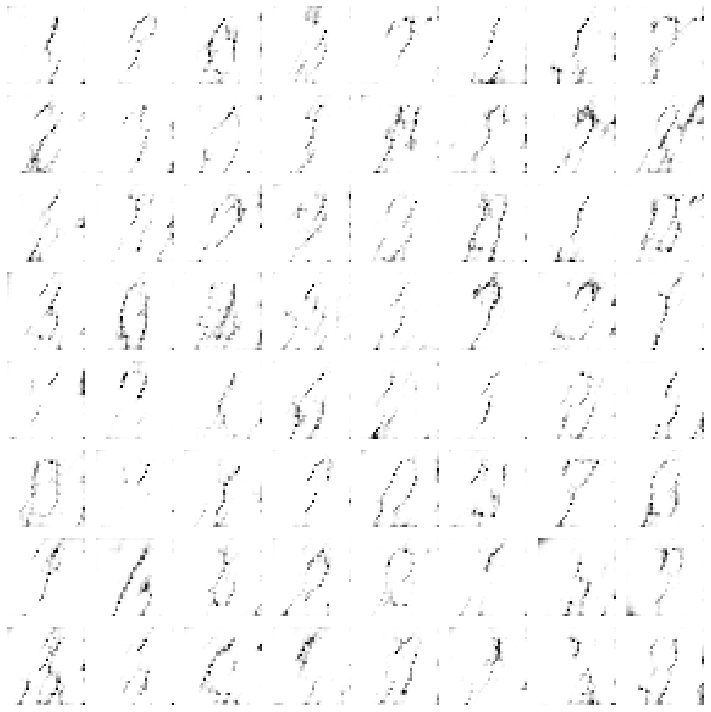

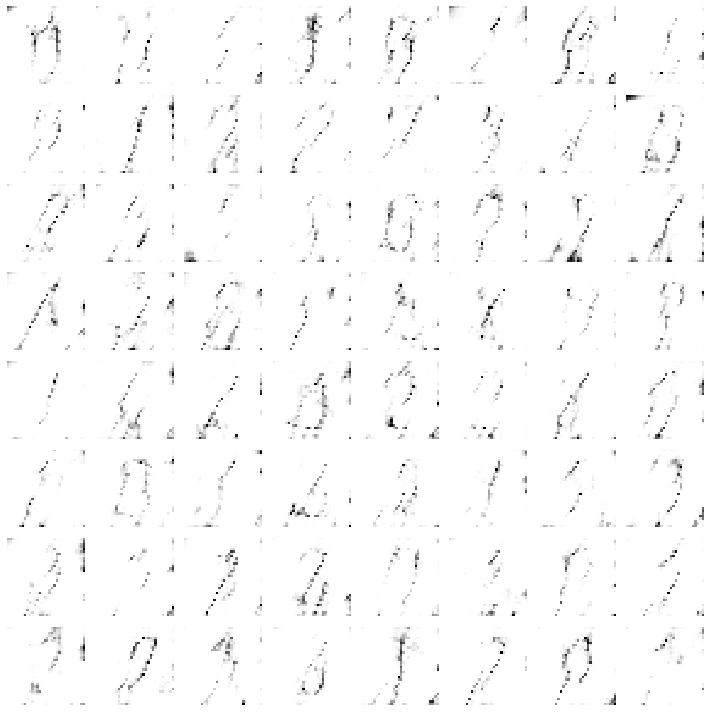

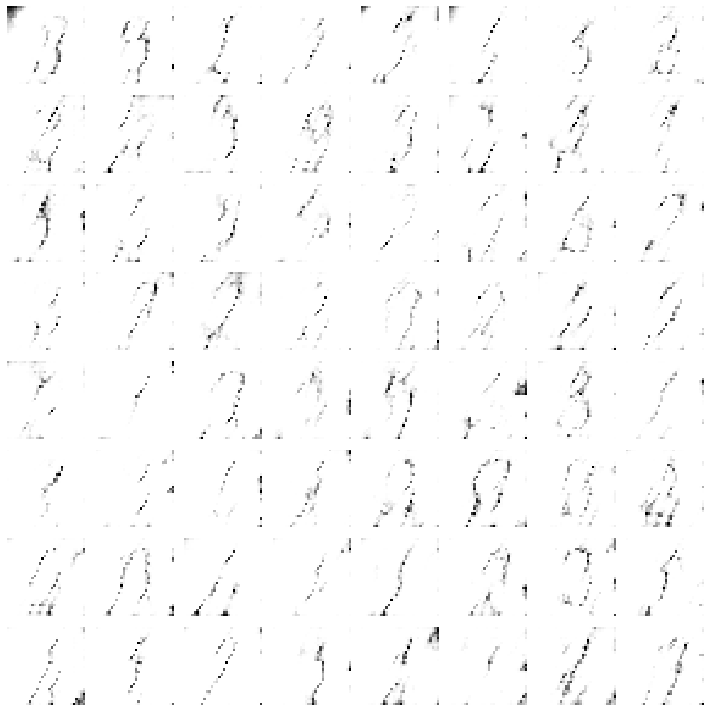

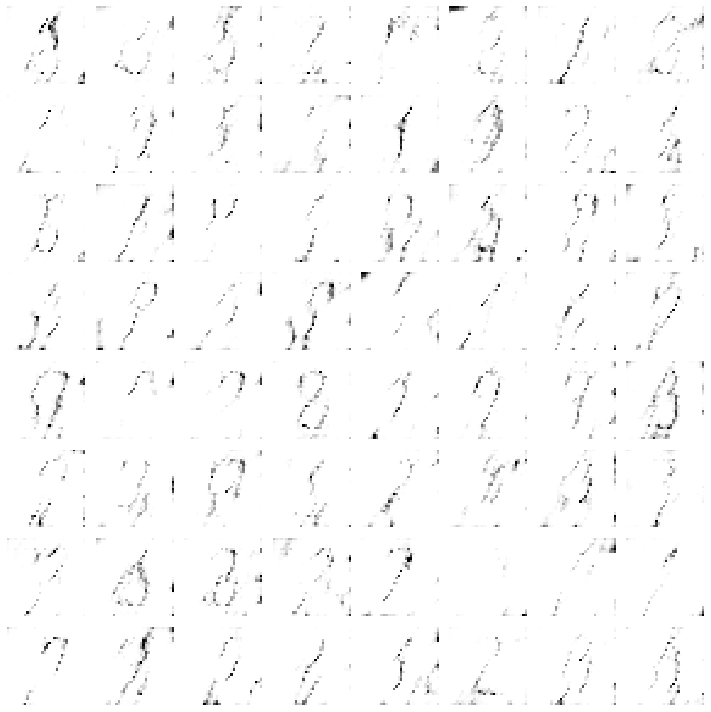

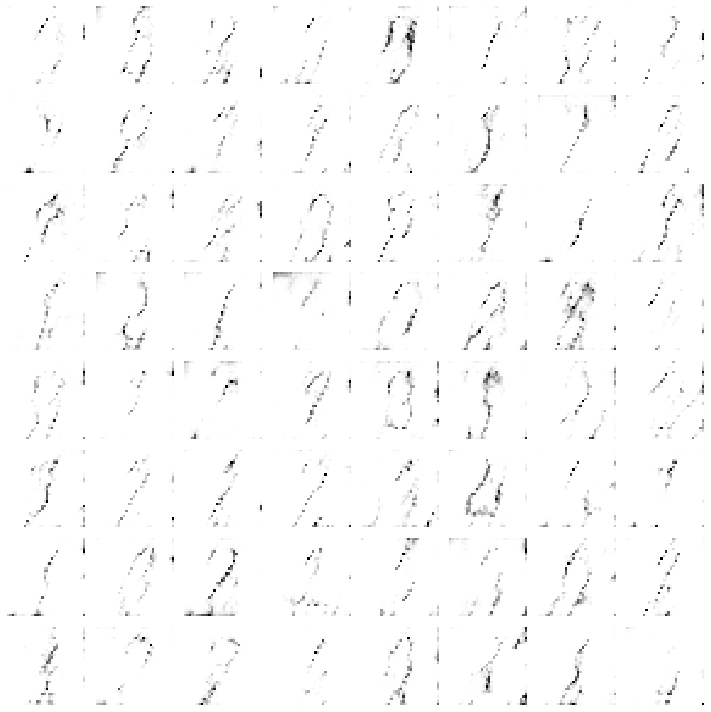

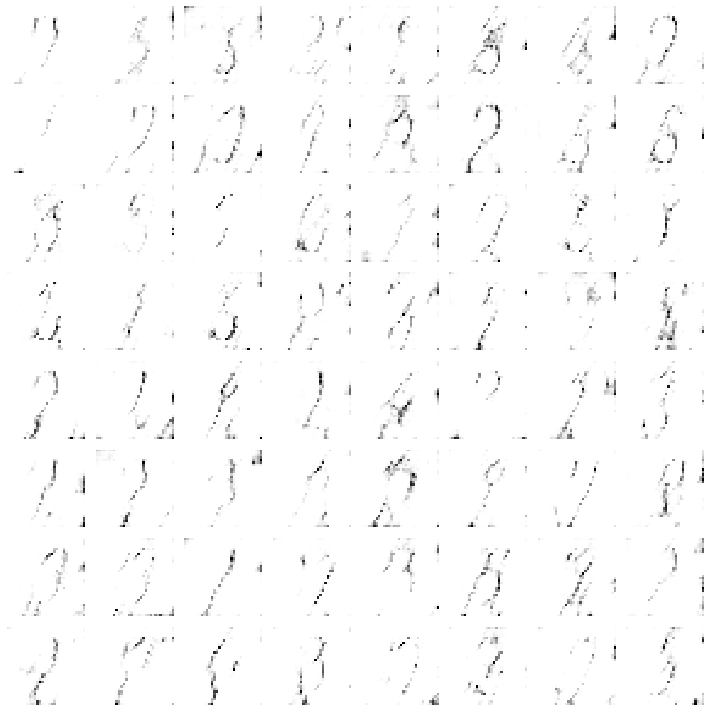

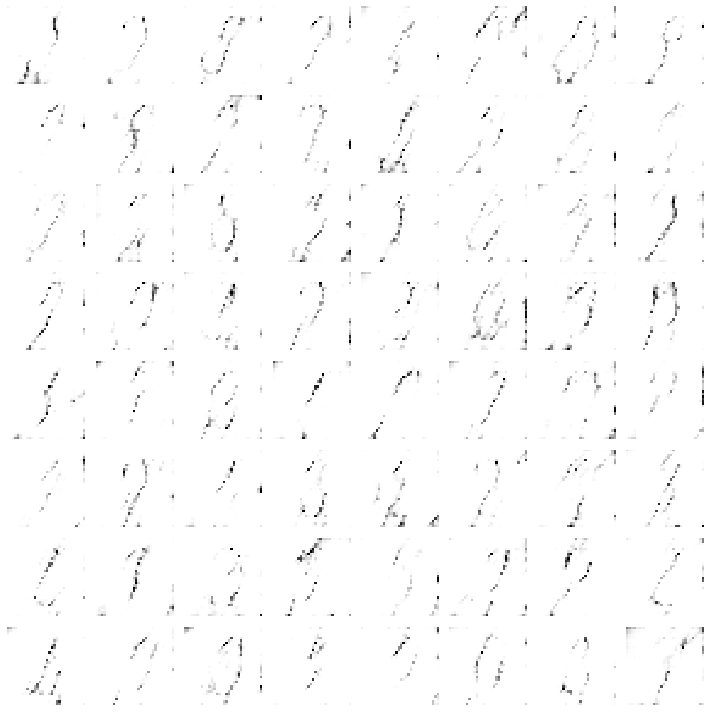

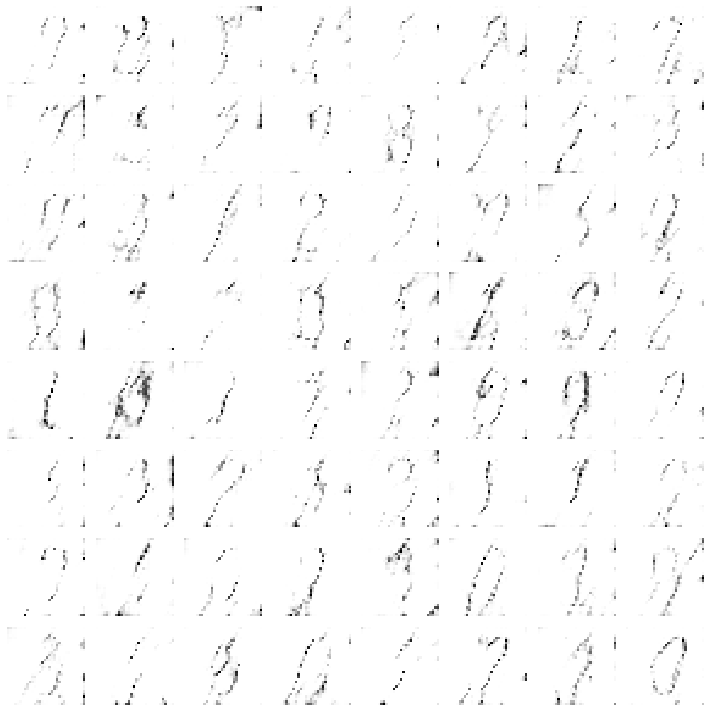

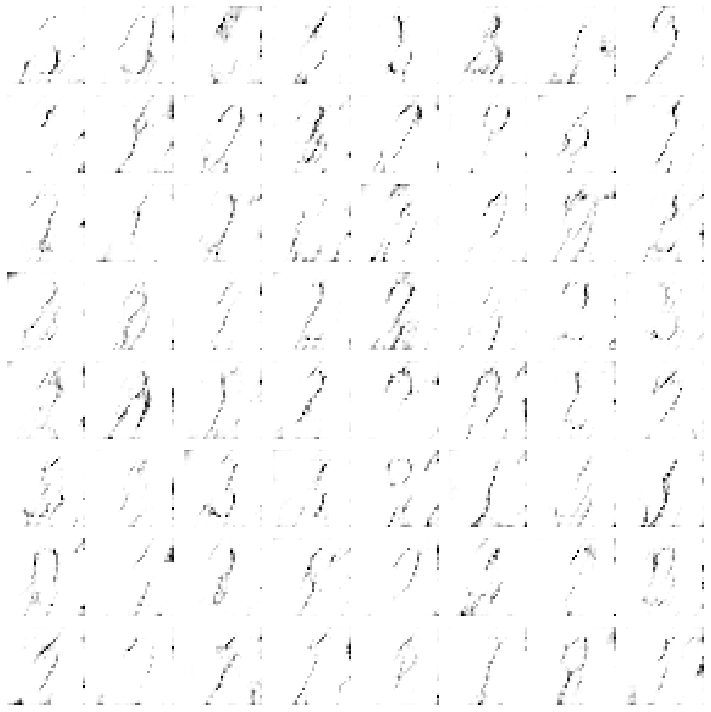

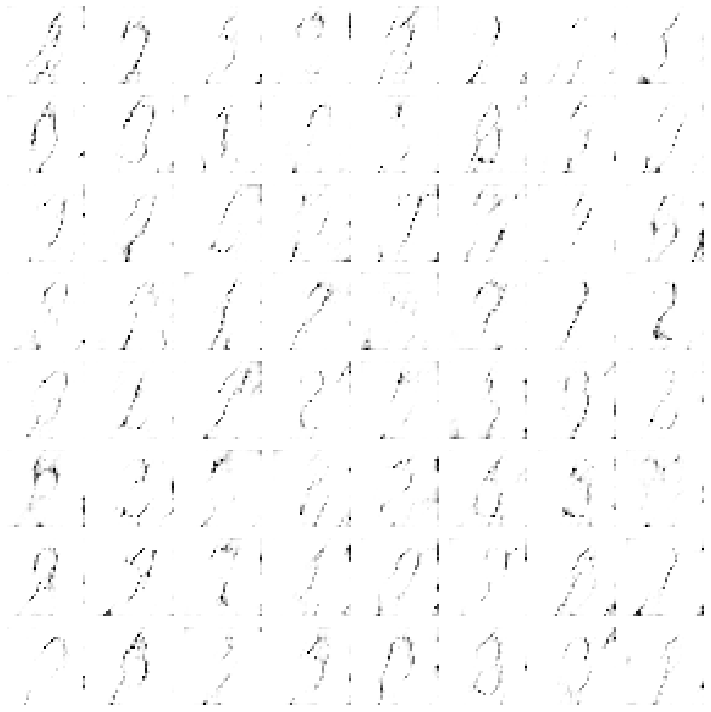

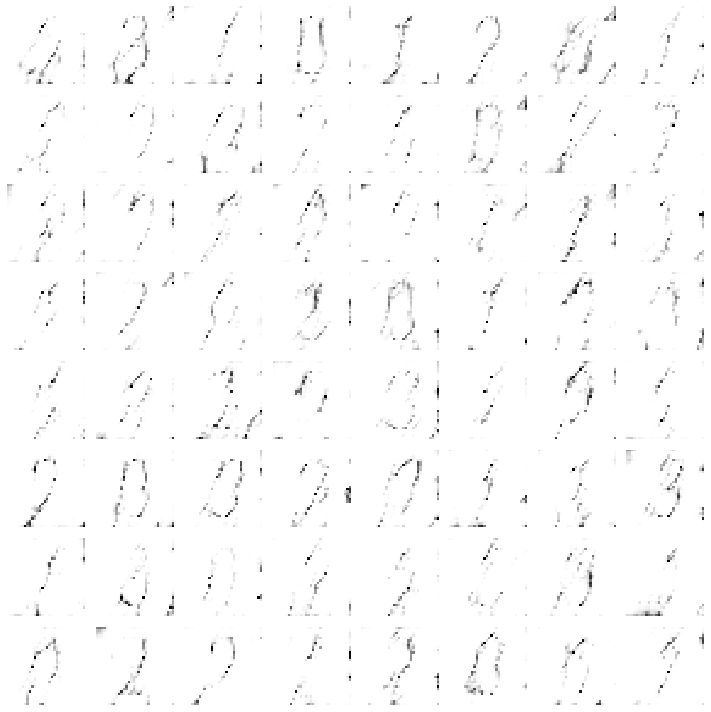

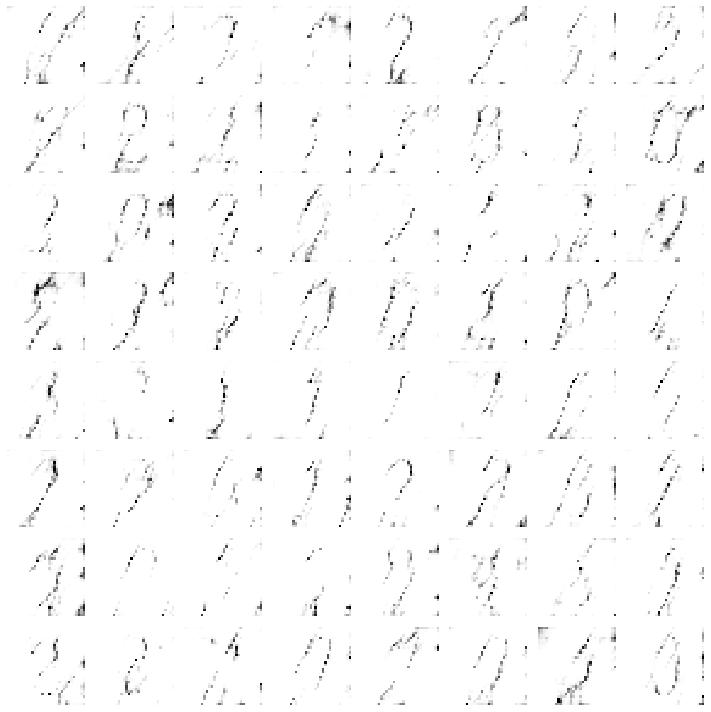

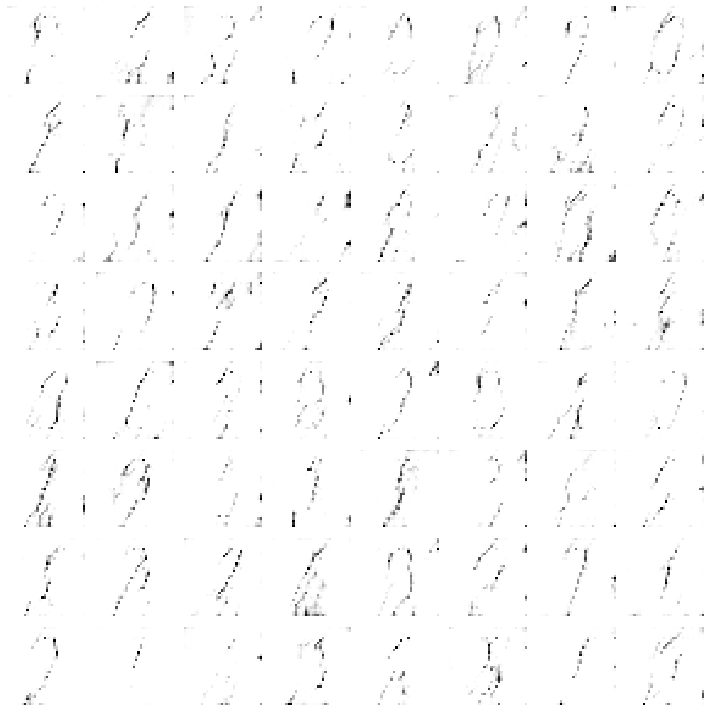

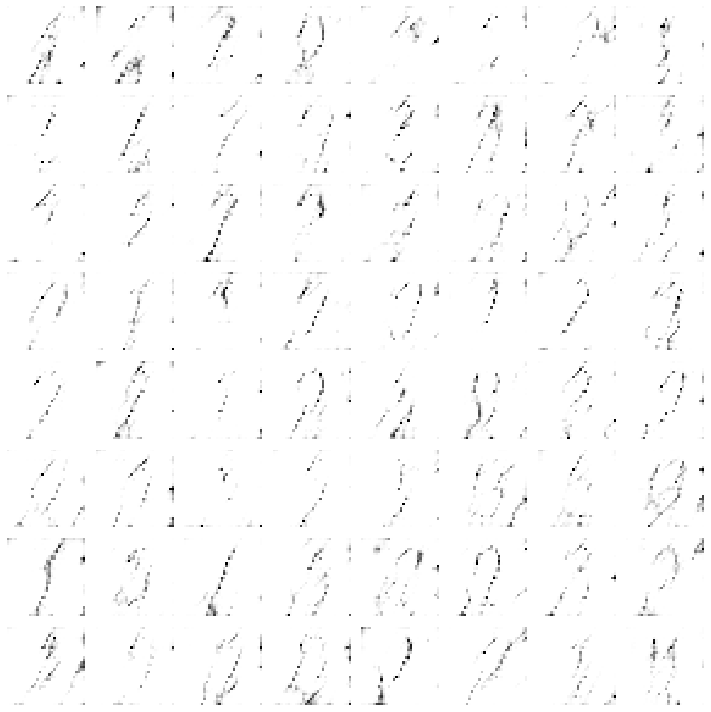

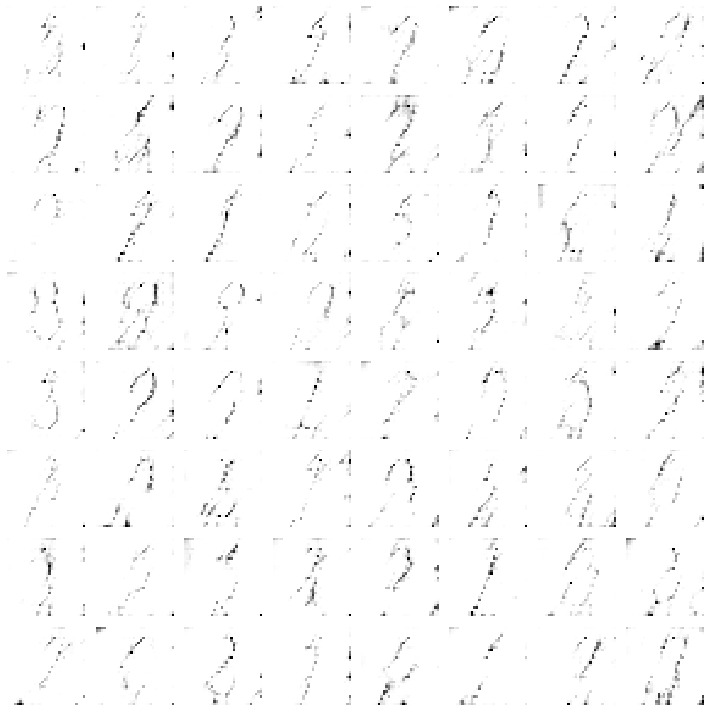

In [ ]:
train_gan(train_dataset, 25)

In [ ]:
128*128

16384

In [ ]:
generator.save('eng-gan-4-g.h5')
discriminator.save('eng-gan-4-d.h5')